# Prepare dataset labels for training


In [1]:
# import packages
import os
import random
import shutil
import xml.etree.ElementTree as ET

### Split to train (0.7), val (0.15), and test (0.15)


In [2]:
dir = os.getcwd() + "/dataset-Face_Mask_Detection/images"

imgs_list = os.listdir(dir)
print(imgs_list)

train_path = os.getcwd() + "/dataset-Face_Mask_Detection/train/images"
val_path = os.getcwd() + "/dataset-Face_Mask_Detection/val/images"
test_path = os.getcwd() + "/dataset-Face_Mask_Detection/test/images"

# set random seed
random.seed(42)
random.shuffle(imgs_list)

train_size = int(len(imgs_list) * 0.7)
val_size = int(len(imgs_list) * 0.15)
test_size = int(len(imgs_list) * 0.15)

print(train_size, val_size, test_size)


for folder_path in [train_path, val_path, test_path]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

for i, f in enumerate(imgs_list):
    if i < train_size:
        dest_folder = train_path
    elif i < train_size + val_size:
        dest_folder = val_path
    else:
        dest_folder = test_path
    shutil.copy(os.path.join(dir, f), os.path.join(dest_folder, f))

['maksssksksss0.png', 'maksssksksss1.png', 'maksssksksss10.png', 'maksssksksss100.png', 'maksssksksss101.png', 'maksssksksss102.png', 'maksssksksss103.png', 'maksssksksss104.png', 'maksssksksss105.png', 'maksssksksss106.png', 'maksssksksss107.png', 'maksssksksss108.png', 'maksssksksss109.png', 'maksssksksss11.png', 'maksssksksss110.png', 'maksssksksss111.png', 'maksssksksss112.png', 'maksssksksss113.png', 'maksssksksss114.png', 'maksssksksss115.png', 'maksssksksss116.png', 'maksssksksss117.png', 'maksssksksss118.png', 'maksssksksss119.png', 'maksssksksss12.png', 'maksssksksss120.png', 'maksssksksss121.png', 'maksssksksss122.png', 'maksssksksss123.png', 'maksssksksss124.png', 'maksssksksss125.png', 'maksssksksss126.png', 'maksssksksss127.png', 'maksssksksss128.png', 'maksssksksss129.png', 'maksssksksss13.png', 'maksssksksss130.png', 'maksssksksss131.png', 'maksssksksss132.png', 'maksssksksss133.png', 'maksssksksss134.png', 'maksssksksss135.png', 'maksssksksss136.png', 'maksssksksss137.p

### Make .txt labels


In [5]:
def annotate_xml_to_txt(file):
    input_dir = os.getcwd() + "/dataset-Face_Mask_Detection/annotations"
    output_dir = os.getcwd() + "/dataset-Face_Mask_Detection/labels"
    classes = {
        "with_mask": "0",  # with mask
        "without_mask": "1",  # without mask
        "mask_weared_incorrect": "2",  # mask worn incorrectly
    }

    # load xml
    tree = ET.parse((os.path.join(input_dir, file)))
    persons = tree.findall("object")
    filename = (tree.find("filename").text).replace("png", "txt")
    print(filename)

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    img_width = int(tree.find("size").find("width").text)
    img_height = int(tree.find("size").find("height").text)
    print(img_width, img_height)

    for i in persons:
        cls = classes[i.find("name").text]  # get the class of each object
        # get the bounding box coorinates:
        bbox = i.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)

        # calculate x, y, width, height
        x = ((xmin + xmax) / 2) / img_width
        y = ((ymin + ymax) / 2) / img_height
        bbox_width = (xmax - xmin) / img_width
        bbox_height = (ymax - ymin) / img_height

        txt_input = [cls, x, y, bbox_width, bbox_height]
        txt_input = [str(i) for i in txt_input]
        txt_input = (" ").join(txt_input) + "\n"
        # print(xmin, ymin, xmax, ymin, xmin, ymax, xmax, ymax)
        print((txt_input))

        with open(os.path.join(output_dir, filename), "a") as file:
            file.write(txt_input)

In [ ]:
# get files list in directory
dir = os.getcwd() + "/dataset-Face_Mask_Detection/annotations"
annotations = os.listdir(dir)
print(annotations)
print(dir)

# Convert each .xml to .txt file
[annotate_xml_to_txt(file) for file in annotations]

### Put appropriate labels for train, val, and test folders


In [14]:
train_path = os.getcwd() + "/dataset-Face_Mask_Detection/train"
val_path = os.getcwd() + "/dataset-Face_Mask_Detection/val"
test_path = os.getcwd() + "/dataset-Face_Mask_Detection/test"
labels_path = os.getcwd() + "/dataset-Face_Mask_Detection/labels"


for folder in [train_path, val_path, test_path]:
    print(folder)
    folder_labels = os.path.join(folder, "labels")
    print(folder_labels)

    files = os.listdir(folder)
    files = [filename.replace(".png", ".txt") for filename in files]

    # make labels folder
    if not os.path.exists(folder_labels):
        os.makedirs(folder_labels)
    print(files)

    # # copy file names from labels path
    [
        shutil.copy(os.path.join(labels_path, filename), folder_labels)
        for filename in files
    ]

d:\Programming\workspace\ML\face_mask_detection_and_counting/dataset-Face_Mask_Detection/train
d:\Programming\workspace\ML\face_mask_detection_and_counting/dataset-Face_Mask_Detection/train\labels
['maksssksksss1.txt', 'maksssksksss10.txt', 'maksssksksss101.txt', 'maksssksksss102.txt', 'maksssksksss105.txt', 'maksssksksss106.txt', 'maksssksksss107.txt', 'maksssksksss109.txt', 'maksssksksss11.txt', 'maksssksksss110.txt', 'maksssksksss111.txt', 'maksssksksss112.txt', 'maksssksksss113.txt', 'maksssksksss114.txt', 'maksssksksss116.txt', 'maksssksksss118.txt', 'maksssksksss119.txt', 'maksssksksss12.txt', 'maksssksksss121.txt', 'maksssksksss123.txt', 'maksssksksss124.txt', 'maksssksksss126.txt', 'maksssksksss128.txt', 'maksssksksss129.txt', 'maksssksksss13.txt', 'maksssksksss130.txt', 'maksssksksss131.txt', 'maksssksksss132.txt', 'maksssksksss133.txt', 'maksssksksss134.txt', 'maksssksksss135.txt', 'maksssksksss136.txt', 'maksssksksss137.txt', 'maksssksksss139.txt', 'maksssksksss140.txt', 'ma

# Train the Model


### Check CUDA


In [2]:
import torch

torch.cuda.is_available()

True

### Train


In [1]:
# import packages
from ultralytics import YOLO
import os
from torch import tensor

In [5]:
data = os.getcwd() + "/dataset-Face_Mask_Detection/data.yaml"

model = YOLO("yolov8n.pt")

epochs = 50
imgsz = 640
batch = 16
device = 0
workers = 1

results = model.train(
    data=data,
    epochs=epochs,
    imgsz=imgsz,
    batch=batch,
    device=device,
    workers=workers,
)

New https://pypi.org/project/ultralytics/8.0.205 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.175  Python-3.11.5 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=d:\Programming\workspace\ML\face_mask_detection_and_counting/dataset-Face_Mask_Detection/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=1, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

# Test model


In [1]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import cv2
from torch import tensor

In [17]:
# define function to count the detections per class
def count_det_per_cls(cls):
    count = {
        "with_mask": 0,  # 0
        "without_mask": 0,  # 1
        "mask_weared_incorrect": 0,  # 2
        "total": len(cls),
    }
    for i in cls:
        i = tensor(i)
        i = i.item()

        if i == 0:
            count["with_mask"] += 1
        if i == 1:
            count["without_mask"] += 1
        if i == 2:
            count["mask_weared_incorrect"] += 1

    return count

In [ ]:
people_tracking = [];

while ret, frame :
    id = rand.int()

    if id not in people_tracking:
        people_tracking.append(id)


    print('count', len(people_tracking))


In [3]:
# load trained model
train = "3"
selected_weight = "best.pt"
trained_model = YOLO(
    os.getcwd() + "/runs/detect/train" + train + "/weights/" + selected_weight
)
print(trained_model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s


0: 384x640 3 with_masks, 1 without_mask, 13.4ms
Speed: 0.0ms preprocess, 13.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
0.0
0.0
0.0
1.0
{'with_mask': 3, 'without_mask': 1, 'mask_weared_incorrect': 0, 'total': 4}
eyey tensor([0., 0., 0., 1.], device='cuda:0')


C:\Users\Dummy\AppData\Local\Temp\ipykernel_28736\199075101.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  i = tensor(i)


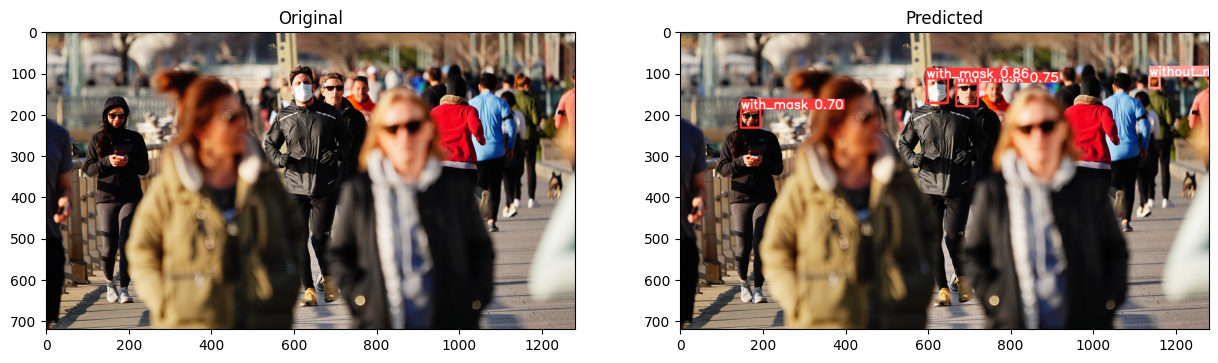


0: 416x640 9 with_masks, 42 without_masks, 3 mask_weared_incorrects, 10.2ms
Speed: 3.6ms preprocess, 10.2ms inference, 5.9ms postprocess per image at shape (1, 3, 416, 640)
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
2.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
{'with_mask': 9, 'without_mask': 42, 'mask_weared_incorrect': 3, 'total': 54}
eyey tensor([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 2., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.], device='cuda:0')


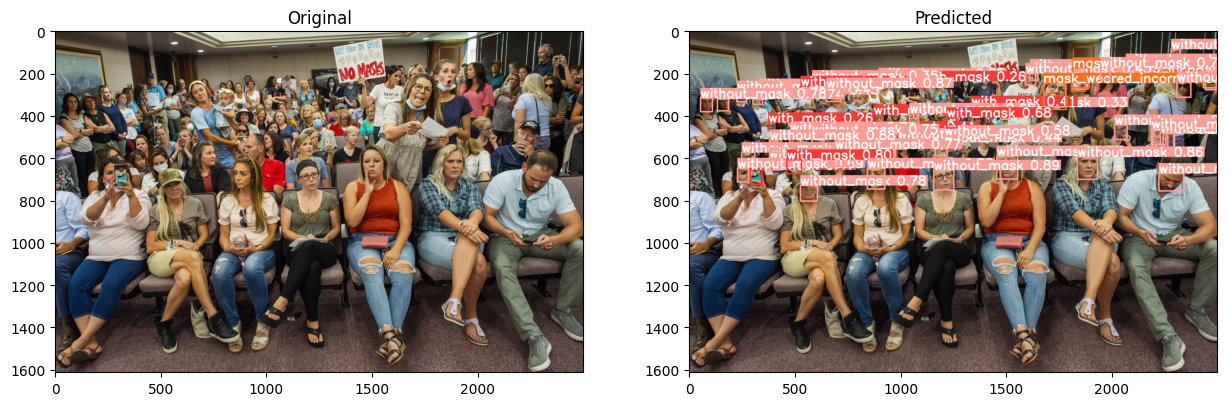


0: 448x640 2 with_masks, 32.9ms
Speed: 8.0ms preprocess, 32.9ms inference, 8.4ms postprocess per image at shape (1, 3, 448, 640)
0.0
0.0
{'with_mask': 2, 'without_mask': 0, 'mask_weared_incorrect': 0, 'total': 2}
eyey tensor([0., 0.], device='cuda:0')


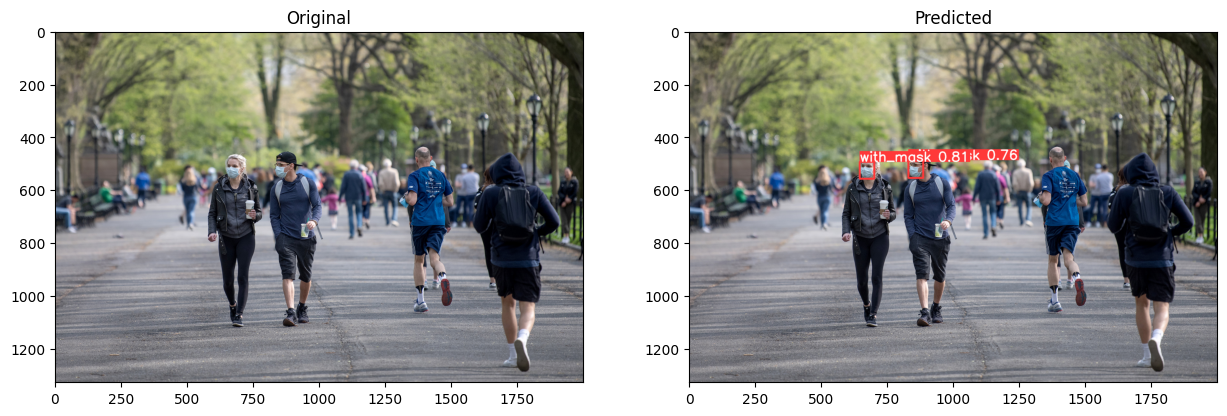


0: 480x640 3 with_masks, 2 without_masks, 24.4ms
Speed: 5.5ms preprocess, 24.4ms inference, 5.2ms postprocess per image at shape (1, 3, 480, 640)
0.0
0.0
0.0
1.0
1.0
{'with_mask': 3, 'without_mask': 2, 'mask_weared_incorrect': 0, 'total': 5}
eyey tensor([0., 0., 0., 1., 1.], device='cuda:0')


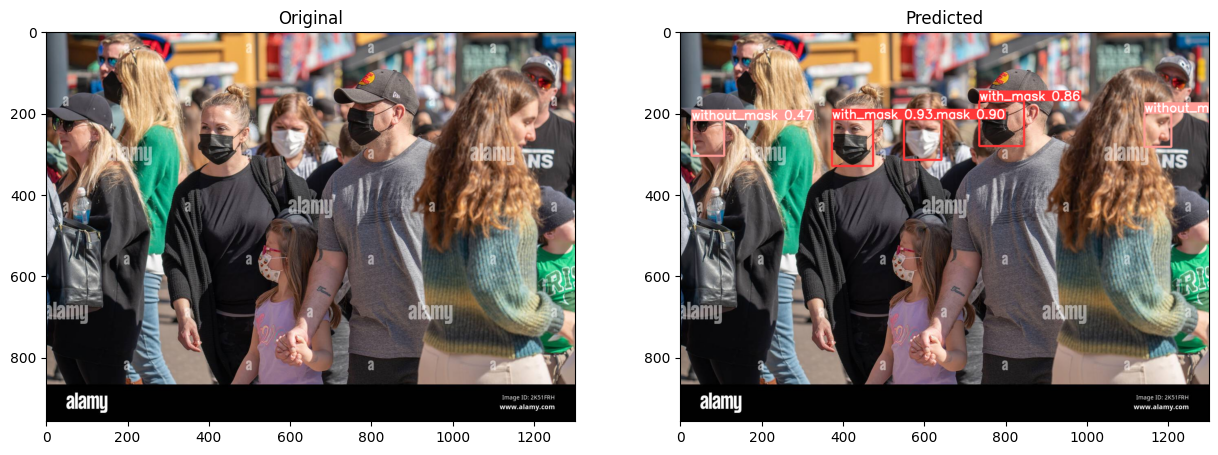


0: 640x640 5 with_masks, 20 without_masks, 1 mask_weared_incorrect, 58.3ms
Speed: 2.1ms preprocess, 58.3ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 640)
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
{'with_mask': 5, 'without_mask': 20, 'mask_weared_incorrect': 1, 'total': 26}
eyey tensor([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.], device='cuda:0')


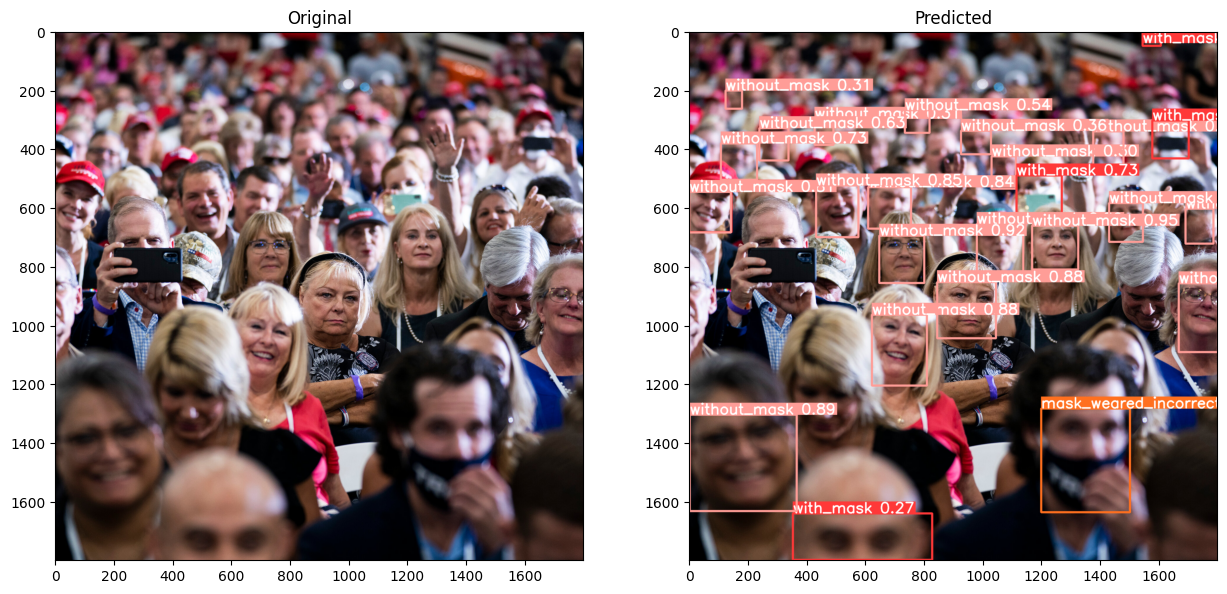

In [18]:
train = "3"
selected_weight = "best.pt"
trained_model = YOLO(
    os.getcwd() + "/runs/detect/train" + train + "/weights/" + selected_weight
)

test_path = os.getcwd() + "/assets"
test_imgs = os.listdir(test_path)


for img in test_imgs:
    img = cv2.imread(os.path.join(test_path, img))

    results = trained_model.predict(img)

    print(count_det_per_cls(results[0].boxes.cls))

    pred = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    f, axarr = plt.subplots(1, 2, figsize=(15, 10))

    axarr[0].imshow(img)

    axarr[0].set_title("Original")

    axarr[1].imshow(pred)

    axarr[1].set_title("Predicted")

    plt.show()